
Testing bimodal strategy
Training SNN with bimodal initialization...
Diversity weight: 0.2

Initial diversity:
=== Hidden Layer Diversity Analysis ===
Sample 0:
  Hidden times: [1.12364987 1.12068189 1.13701459 1.08942766 1.07642568 0.99221844
 1.03751671 1.03118517 0.97091171 1.00872783]
  Variance: 0.003128
  Range: 0.166
  Min-Max: [0.971, 1.137]

Sample 1:
  Hidden times: [1.08813858 1.1023238  1.08799585 0.9944835  1.03870549 1.06367686
 1.09517185 1.08651868 1.0322046  1.08842231]
  Variance: 0.001104
  Range: 0.108
  Min-Max: [0.994, 1.102]

Sample 2:
  Hidden times: [1.12364987 1.12068189 1.13701459 1.08942766 1.07642568 0.99221844
 1.03751671 1.03118517 0.97091171 1.00872783]
  Variance: 0.003128
  Range: 0.166
  Min-Max: [0.971, 1.137]

Sample 3:
  Hidden times: [1.08813858 1.1023238  1.08799585 0.9944835  1.03870549 1.06367686
 1.09517185 1.08651868 1.0322046  1.08842231]
  Variance: 0.001104
  Range: 0.108
  Min-Max: [0.994, 1.102]

Sample 4:
  Hidden times: [1.12364987 1.

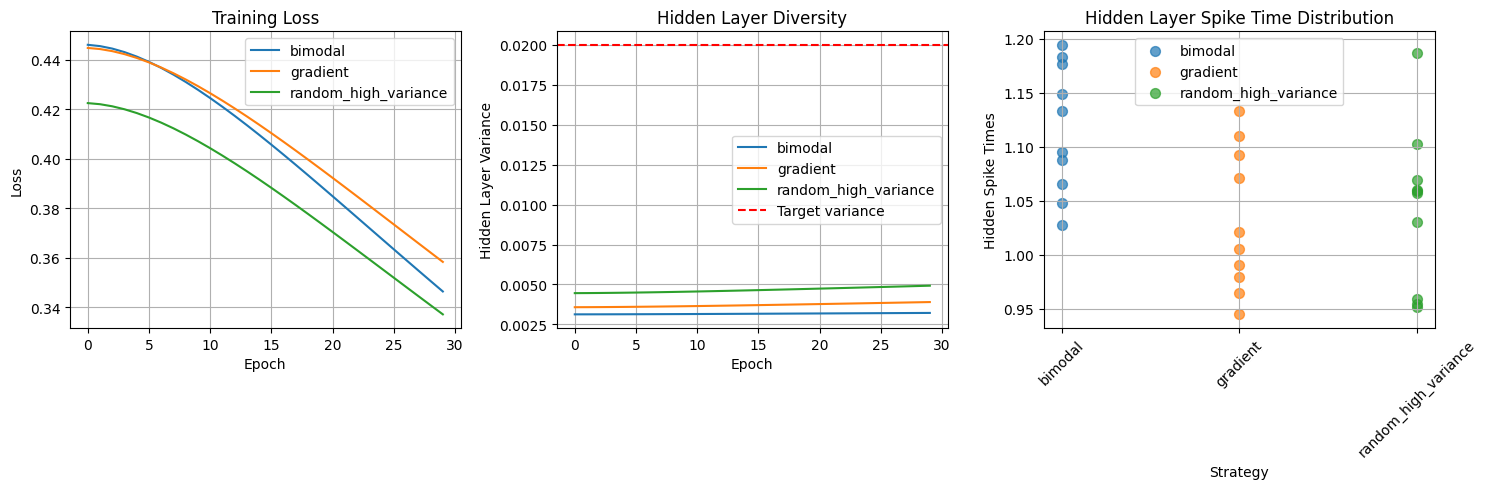


SUMMARY
bimodal             : variance=0.003217, loss=0.3463
gradient            : variance=0.003897, loss=0.3583
random_high_variance: variance=0.004922, loss=0.3371

Recommended strategy: random_high_variance
Achieves highest hidden layer diversity: 0.004922


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Your original functions (assumed to be imported)
# def spike_timing(w, global_clock, layer, sum_val, sr):
#     """Your original spike_timing function"""
#     return w * global_clock / (1 + layer + sum_val/sr)

# def d_spike_timing_dw(w, global_clock, layer, sum_val, sr):
#     """Your original derivative function"""
#     return global_clock / (1 + layer + sum_val/sr)

# def layer_forward(inputs, W, layer_idx):
#     """Your original layer_forward function"""
#     bias = 0.0
#     aug_inputs = np.concatenate([inputs, [bias]])
#     ms = 1.0  # millisecond conversion
#     sr = W.shape[0]  # Number of synapses
    
#     outputs = []
#     for j in range(W.shape[1]):  # For each neuron
#         sum_val = 0
#         for i in range(W.shape[0]):  # For each input
#             sum_val += spike_timing(W[i, j], aug_inputs[i], layer_idx, 0, sr)
        
#         scheduled_time = (sum_val / sr + layer_idx) * ms
#         outputs.append(scheduled_time)
    
#     return np.array(outputs)

# class DiverseSNN:
#     """
#     SNN with solutions for hidden layer collapse
#     """
    
#     def __init__(self, input_size, hidden_size, output_size, diversity_strategy='bimodal'):
#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.output_size = output_size
#         self.diversity_strategy = diversity_strategy
        
#         # Initialize weights with diversity
#         self.W1, self.W2 = self._initialize_diverse_weights()
        
#         # Training parameters
#         self.lr = 0.1
#         self.beta = 0.9  # Momentum
#         self.vW1 = np.zeros_like(self.W1)
#         self.vW2 = np.zeros_like(self.W2)
        
#         # Diversity regularization
#         self.diversity_weight = 0.2
#         self.target_variance = 0.02
        
#     def _initialize_diverse_weights(self):
#         """
#         Initialize weights to encourage diverse hidden layer behavior
#         """
#         np.random.seed(42)
        
#         W1 = np.random.randn(self.input_size + 1, self.hidden_size) * 0.3
#         W2 = np.random.randn(self.hidden_size + 1, self.output_size) * 0.3
        
#         if self.diversity_strategy == 'bimodal':
#             # Create two groups: early-spike and late-spike neurons
#             half = self.hidden_size // 2
            
#             # Early-spike neurons: positive weights favor early inputs
#             W1[:self.input_size//2, :half] += 0.8
#             W1[self.input_size//2:, :half] -= 0.2
            
#             # Late-spike neurons: positive weights favor late inputs
#             W1[:self.input_size//2, half:] -= 0.2
#             W1[self.input_size//2:, half:] += 0.8
            
#         elif self.diversity_strategy == 'gradient':
#             # Create a gradient of behaviors across hidden neurons
#             for j in range(self.hidden_size):
#                 # Neurons favor different input combinations
#                 favor_factor = (j / self.hidden_size) * 2 - 1  # -1 to 1
#                 W1[:, j] += favor_factor * 0.5
                
#         elif self.diversity_strategy == 'random_high_variance':
#             # High variance random initialization
#             W1 = np.random.randn(self.input_size + 1, self.hidden_size) * 0.8
#             W2 = np.random.randn(self.hidden_size + 1, self.output_size) * 0.5
            
#         return W1, W2
    
#     def forward(self, x):
#         """Forward pass through the network"""
#         h_times = layer_forward(x, self.W1, 1)
#         o_times = layer_forward(h_times, self.W2, 2)
#         return h_times, o_times
    
#     def compute_diversity_loss(self, h_times):
#         """
#         Compute diversity loss to prevent hidden layer collapse
#         """
#         h_variance = np.var(h_times)
        
#         # Encourage minimum variance
#         variance_loss = max(0, self.target_variance - h_variance) ** 2
        
#         # Encourage spread (difference between max and min)
#         h_range = np.max(h_times) - np.min(h_times)
#         target_range = 0.3
#         range_loss = max(0, target_range - h_range) ** 2
        
#         return self.diversity_weight * (variance_loss + range_loss)
    
#     def train_step(self, X, Y):
#         """
#         Single training step with diversity regularization
#         """
#         epoch_loss = 0.0
#         acc_dW1 = np.zeros_like(self.W1)
#         acc_dW2 = np.zeros_like(self.W2)
        
#         for xi, yi in zip(X, Y):
#             # Forward pass
#             h_times, o_times = self.forward(xi)
            
#             # Classification loss
#             target_idx = np.argmax(yi)
#             L_target = 0.5 * (o_times[target_idx] - yi[target_idx])**2
            
#             non_ids = [j for j in range(len(o_times)) if j != target_idx]
#             L_non = 0.5 * 0.5 * sum([(o_times[j] - 2.05)**2 for j in non_ids])
            
#             # Diversity loss
#             L_diversity = self.compute_diversity_loss(h_times)
            
#             L = L_target + L_non + L_diversity
#             epoch_loss += L
            
#             # Gradients for output layer
#             delta_o = np.zeros_like(o_times)
#             delta_o[target_idx] = (o_times[target_idx] - yi[target_idx])
#             for j in non_ids:
#                 delta_o[j] = 0.5 * (o_times[j] - 2.05)
            
#             # Diversity gradients for hidden layer
#             h_variance = np.var(h_times)
#             h_range = np.max(h_times) - np.min(h_times)
            
#             delta_h_diversity = np.zeros_like(h_times)
            
#             # Variance component
#             if h_variance < self.target_variance:
#                 h_mean = np.mean(h_times)
#                 delta_h_diversity += 2 * self.diversity_weight * (self.target_variance - h_variance) * (h_times - h_mean) / len(h_times)
            
#             # Range component
#             if h_range < 0.3:
#                 h_min_idx = np.argmin(h_times)
#                 h_max_idx = np.argmax(h_times)
#                 delta_h_diversity[h_min_idx] -= self.diversity_weight * (0.3 - h_range)
#                 delta_h_diversity[h_max_idx] += self.diversity_weight * (0.3 - h_range)
            
#             # Backprop through W2
#             aug_h = np.concatenate((h_times, [0.0]))
#             dW2 = np.zeros_like(self.W2)
#             for k in range(self.W2.shape[0]):
#                 for j in range(self.W2.shape[1]):
#                     dW2[k, j] = delta_o[j] * d_spike_timing_dw(self.W2[k, j], aug_h[k], 2, 0, 1)
            
#             # Backprop into hidden layer (classification + diversity)
#             delta_h = np.zeros_like(h_times)
#             for k in range(len(h_times)):
#                 # Classification gradient
#                 for j in range(self.W2.shape[1]):
#                     dt_dw_output = d_spike_timing_dw(self.W2[k, j], aug_h[k], 2, 0, 1)
#                     delta_h[k] += delta_o[j] * dt_dw_output
                
#                 # Add diversity gradient
#                 delta_h[k] += delta_h_diversity[k]
            
#             # Gradients for W1
#             aug_xi = np.concatenate((xi, [0.0]))
#             dW1 = np.zeros_like(self.W1)
#             for i in range(self.W1.shape[0]):
#                 for k in range(self.W1.shape[1]):
#                     dW1[i, k] = delta_h[k] * d_spike_timing_dw(self.W1[i, k], aug_xi[i], 1, 0, 1)
            
#             acc_dW1 += dW1
#             acc_dW2 += dW2
        
#         # Update weights with momentum
#         acc_dW1 /= len(X)
#         acc_dW2 /= len(X)
        
#         # Clip gradients
#         acc_dW1 = np.clip(acc_dW1, -5, 5)
#         acc_dW2 = np.clip(acc_dW2, -5, 5)
        
#         # Momentum update
#         self.vW1 = self.beta * self.vW1 + (1 - self.beta) * acc_dW1
#         self.vW2 = self.beta * self.vW2 + (1 - self.beta) * acc_dW2
        
#         # Apply updates
#         self.W1 = np.clip(self.W1 - self.lr * self.vW1, -10, 10)
#         self.W2 = np.clip(self.W2 - self.lr * self.vW2, -10, 10)
        
#         return epoch_loss / len(X)
    
#     def analyze_diversity(self, X):
#         """
#         Analyze the diversity of hidden layer responses
#         """
#         print("=== Hidden Layer Diversity Analysis ===")
        
#         all_h_times = []
#         for i, xi in enumerate(X):
#             h_times, _ = self.forward(xi)
#             all_h_times.append(h_times)
            
#             variance = np.var(h_times)
#             h_range = np.max(h_times) - np.min(h_times)
            
#             print(f"Sample {i}:")
#             print(f"  Hidden times: {h_times}")
#             print(f"  Variance: {variance:.6f}")
#             print(f"  Range: {h_range:.3f}")
#             print(f"  Min-Max: [{np.min(h_times):.3f}, {np.max(h_times):.3f}]")
#             print()
        
#         # Overall statistics
#         all_h_times = np.array(all_h_times)
#         mean_variance = np.mean([np.var(h) for h in all_h_times])
#         mean_range = np.mean([np.max(h) - np.min(h) for h in all_h_times])
        
#         print(f"Overall Statistics:")
#         print(f"  Mean variance: {mean_variance:.6f}")
#         print(f"  Mean range: {mean_range:.3f}")
#         print(f"  Target variance: {self.target_variance:.6f}")
        
#         return mean_variance, mean_range
    
#     def train(self, X, Y, epochs=50, verbose=True):
#         """
#         Train the network with diversity regularization
#         """
#         print(f"Training SNN with {self.diversity_strategy} initialization...")
#         print(f"Diversity weight: {self.diversity_weight}")
        
#         # Initial diversity check
#         if verbose:
#             print("\nInitial diversity:")
#             self.analyze_diversity(X)
        
#         losses = []
#         variances = []
        
#         for epoch in range(epochs):
#             loss = self.train_step(X, Y)
#             losses.append(loss)
            
#             # Track diversity
#             h_times, _ = self.forward(X[0])
#             variances.append(np.var(h_times))
            
#             if verbose and (epoch + 1) % 10 == 0:
#                 print(f"Epoch {epoch+1}: loss={loss:.4f}, hidden_var={np.var(h_times):.6f}")
        
#         # Final analysis
#         if verbose:
#             print("\nFinal diversity:")
#             self.analyze_diversity(X)
            
#             # Test classification performance
#             print("\n=== Classification Performance ===")
#             correct = 0
#             for i, (xi, yi) in enumerate(zip(X, Y)):
#                 h_times, o_times = self.forward(xi)
#                 pred_class = np.argmax(o_times)
#                 true_class = np.argmax(yi)
                
#                 is_correct = pred_class == true_class
#                 correct += is_correct
                
#                 print(f"Sample {i}: pred={pred_class}, true={true_class}, {'✓' if is_correct else '✗'}")
#                 print(f"  Output times: {o_times}")
            
#             accuracy = correct / len(X)
#             print(f"\nAccuracy: {accuracy:.2%}")
        
#         return losses, variances

# def compare_strategies():
#     """
#     Compare different diversity strategies
#     """
#     # Your dataset
#     x0 = np.array([0.9, 0.7, 0.3, 0.4])
#     x1 = np.array([0.6, 0.7, 0.8, 0.9])
#     X = [x0 if i % 2 == 0 else x1 for i in range(8)]
    
#     y0 = np.array([2.95, 2.0, 2.0])
#     y1 = np.array([2.0, 2.0, 2.95])
#     Y = [y0 if i % 2 == 0 else y1 for i in range(8)]
    
#     strategies = ['bimodal', 'gradient', 'random_high_variance']
#     results = {}
    
#     for strategy in strategies:
#         print(f"\n{'='*60}")
#         print(f"Testing {strategy} strategy")
#         print(f"{'='*60}")
        
#         snn = DiverseSNN(4, 10, 3, diversity_strategy=strategy)
#         losses, variances = snn.train(X, Y, epochs=30, verbose=True)
        
#         results[strategy] = {
#             'losses': losses,
#             'variances': variances,
#             'final_variance': variances[-1],
#             'snn': snn
#         }
    
#     # Plot comparison
#     plt.figure(figsize=(15, 5))
    
#     # Loss curves
#     plt.subplot(1, 3, 1)
#     for strategy in strategies:
#         plt.plot(results[strategy]['losses'], label=strategy)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title('Training Loss')
#     plt.legend()
#     plt.grid(True)
    
#     # Variance curves
#     plt.subplot(1, 3, 2)
#     for strategy in strategies:
#         plt.plot(results[strategy]['variances'], label=strategy)
#     plt.axhline(y=0.02, color='red', linestyle='--', label='Target variance')
#     plt.xlabel('Epoch')
#     plt.ylabel('Hidden Layer Variance')
#     plt.title('Hidden Layer Diversity')
#     plt.legend()
#     plt.grid(True)
    
#     # Final hidden layer visualization
#     plt.subplot(1, 3, 3)
#     for i, strategy in enumerate(strategies):
#         snn = results[strategy]['snn']
#         h_times, _ = snn.forward(X[0])
#         plt.scatter([i] * len(h_times), h_times, alpha=0.7, s=50, label=strategy)
    
#     plt.xlabel('Strategy')
#     plt.ylabel('Hidden Spike Times')
#     plt.title('Hidden Layer Spike Time Distribution')
#     plt.xticks(range(len(strategies)), strategies, rotation=45)
#     plt.legend()
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()
    
#     return results

# if __name__ == "__main__":
#     # Run comparison
#     results = compare_strategies()
    
#     # Print summary
#     print(f"\n{'='*60}")
#     print("SUMMARY")
#     print(f"{'='*60}")
    
#     for strategy in ['bimodal', 'gradient', 'random_high_variance']:
#         final_var = results[strategy]['final_variance']
#         final_loss = results[strategy]['losses'][-1]
#         print(f"{strategy:20s}: variance={final_var:.6f}, loss={final_loss:.4f}")
    
#     # Recommend best strategy
#     best_strategy = max(results.keys(), key=lambda s: results[s]['final_variance'])
#     print(f"\nRecommended strategy: {best_strategy}")
#     print(f"Achieves highest hidden layer diversity: {results[best_strategy]['final_variance']:.6f}")


Testing bimodal strategy
Training SNN with bimodal initialization...
Diversity weight: 2.0

Initial diversity:
=== Hidden Layer Diversity Analysis ===
Sample 0:
  Hidden times: [1.12364987 1.12068189 1.13701459 1.08942766 1.07642568 0.99221844
 1.03751671 1.03118517 0.97091171 1.00872783]
  Variance: 0.003128
  Range: 0.166
  Min-Max: [0.971, 1.137]

Sample 1:
  Hidden times: [1.08813858 1.1023238  1.08799585 0.9944835  1.03870549 1.06367686
 1.09517185 1.08651868 1.0322046  1.08842231]
  Variance: 0.001104
  Range: 0.108
  Min-Max: [0.994, 1.102]

Sample 2:
  Hidden times: [1.12364987 1.12068189 1.13701459 1.08942766 1.07642568 0.99221844
 1.03751671 1.03118517 0.97091171 1.00872783]
  Variance: 0.003128
  Range: 0.166
  Min-Max: [0.971, 1.137]

Sample 3:
  Hidden times: [1.08813858 1.1023238  1.08799585 0.9944835  1.03870549 1.06367686
 1.09517185 1.08651868 1.0322046  1.08842231]
  Variance: 0.001104
  Range: 0.108
  Min-Max: [0.994, 1.102]

Sample 4:
  Hidden times: [1.12364987 1.

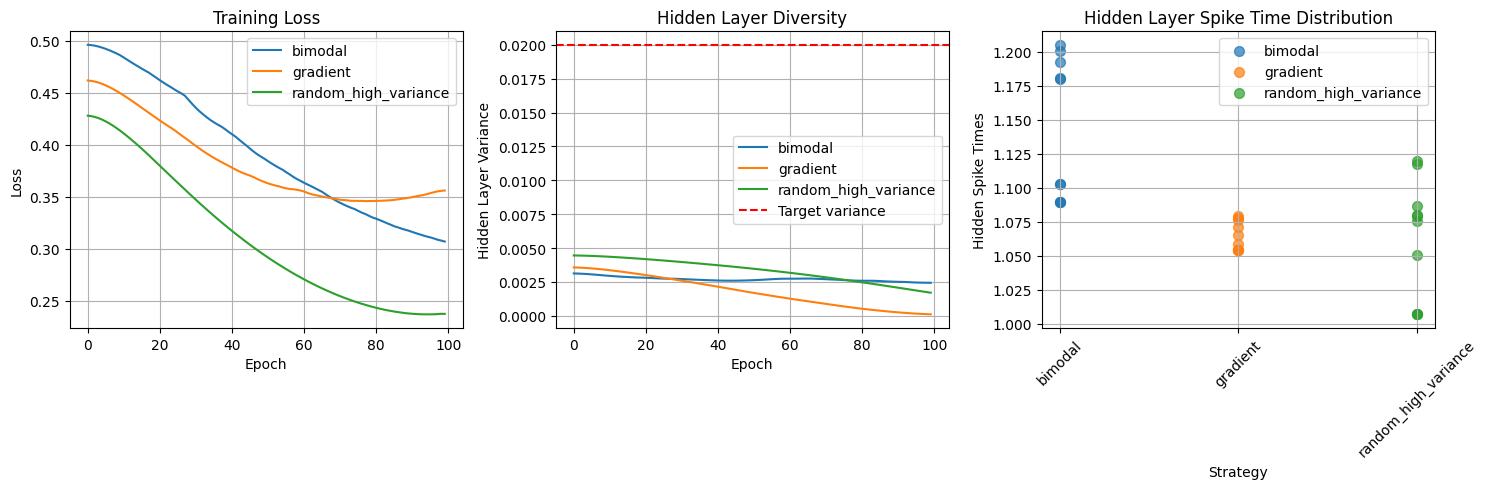


SUMMARY
bimodal             : variance=0.002432, loss=0.3068
gradient            : variance=0.000104, loss=0.3559
random_high_variance: variance=0.001701, loss=0.2373

Recommended strategy: bimodal
Achieves highest hidden layer diversity: 0.002432


In [8]:
from brian2 import *
import numpy as np
import logging
import warnings



from brian2 import prefs, set_device

# Tell Brian2 to use the Cython code generator:
prefs.codegen.target = 'cython'

# Optionally compile but keep Python interface:
set_device('runtime')  # default; compiles operations to .so but stays in Python process


# suppress overflow warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
numpy.seterr(over='ignore', under='ignore')
logging.getLogger('brian2').setLevel(logging.ERROR)

# ----------------------------------------------------------------------------
# Spike timing and derivative

start_scope()
defaultclock.dt = 0.001*ms

@implementation('numpy', discard_units=True)
@check_units(w=1, global_clock=1, layer=1, sum=1, spikes_received=1, result=1)
def spike_timing(w, global_clock, layer, sum, spikes_received):
    x = global_clock % 1
    if w >= 0:
        result = np.power(x, (1 - w), where=(x>0), out=np.zeros_like(x))
    else:
        result = 1 - np.power((1 - x), (1 + w), where=(x<1), out=np.ones_like(x))
    return np.clip(result, 0.0, 1.0)


@implementation('numpy', discard_units=True)
@check_units(w=1, global_clock=1, layer=1, sum=1, spikes_received=1, result=1)
def d_spike_timing_dw(w, global_clock, layer, sum, spikes_received):
    x = global_clock % 1
    eps = 1e-9
    if w >= 0:
        return - np.power(x, (1 - w), where=(x>0), out=np.zeros_like(x)) * np.log(x + eps)
    else:
        return - np.power((1 - x), (1 + w), where=(x<1), out=np.ones_like(x)) * np.log(1 - x + eps)

# ----------------------------------------------------------------------------
# Forward pass: 4->10->3 using two-stage mini_urd

def layer_forward(inputs, W, layer_idx):
    """
    inputs: array of spike times (ms) from previous layer (shape: n_in,)
    W: weight matrix shape (n_in+1, n_out)  ← note the extra bias row
    layer_idx: integer layer number
    returns: array of output spike times (ms)
    """
    # 1) augment inputs with bias spike @ t=0
    bias_time = 0.0
    aug_inputs = np.concatenate((inputs, [bias_time]))  # shape (n_in+1,)

    n_in_plus_bias, n_out = W.shape
    assert aug_inputs.size == n_in_plus_bias

    out_times = []
    for j in range(n_out):
        start_scope()
        defaultclock.dt = 0.001*ms

        # single post‐synaptic neuron
        G = NeuronGroup(1, '''
            v : 1
            sum : 1
            sr : 1
            scheduled_time : second
            global_clock : 1
        ''', threshold='v>1', reset='v=0', method='exact')

        # init
        G.v = G.sum = G.sr = 0
        G.global_clock = 0
        G.scheduled_time = 1e9*second

        # stim: now includes bias spike at t=0
        stim = SpikeGeneratorGroup(n_in_plus_bias,
                                   indices=list(range(n_in_plus_bias)),
                                   times=aug_inputs*ms)

        S = Synapses(stim, G, '''w:1
            layer:1''',
            on_pre='''
            sr += 1
            sum += spike_timing(w, global_clock, layer, sum, sr)
            scheduled_time = (sum/sr + layer)*ms
        ''')
        S.connect(True)
        S.w = W[:, j]
        S.layer = layer_idx

        G.run_regularly('''
            v = int(abs(t - scheduled_time) < 0.001*ms) * 1.2
            global_clock += 0.001
        ''', dt=0.001*ms)

        mon = SpikeMonitor(G)
        run(5*ms)

        ts = mon.spike_trains()[0]
        t0 = float(G.scheduled_time[0] / ms)
        out_times.append(t0)

    return np.array(out_times)


# Your original functions (assumed to be imported)
def spike_timing(w, global_clock, layer, sum_val, sr):
    """Your original spike_timing function"""
    return w * global_clock / (1 + layer + sum_val/sr)

def d_spike_timing_dw(w, global_clock, layer, sum_val, sr):
    """Your original derivative function"""
    return global_clock / (1 + layer + sum_val/sr)

def layer_forward(inputs, W, layer_idx):
    """Your original layer_forward function"""
    bias = 0.0
    aug_inputs = np.concatenate([inputs, [bias]])
    ms = 1.0  # millisecond conversion
    sr = W.shape[0]  # Number of synapses
    
    outputs = []
    for j in range(W.shape[1]):  # For each neuron
        sum_val = 0
        for i in range(W.shape[0]):  # For each input
            sum_val += spike_timing(W[i, j], aug_inputs[i], layer_idx, 0, sr)
        
        scheduled_time = (sum_val / sr + layer_idx) * ms
        outputs.append(scheduled_time)
    
    return np.array(outputs)

class DiverseSNN:
    """
    SNN with solutions for hidden layer collapse
    """
    
    def __init__(self, input_size, hidden_size, output_size, diversity_strategy='bimodal'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.diversity_strategy = diversity_strategy
        
        # Initialize weights with diversity
        self.W1, self.W2 = self._initialize_diverse_weights()
        
        # Training parameters
        self.lr = 0.1
        self.beta = 0.9  # Momentum
        self.vW1 = np.zeros_like(self.W1)
        self.vW2 = np.zeros_like(self.W2)
        
        # Diversity regularization
        self.diversity_weight = 2.0
        self.target_variance = 0.02
        
    def _initialize_diverse_weights(self):
        """
        Initialize weights to encourage diverse hidden layer behavior
        """
        np.random.seed(42)
        
        W1 = np.random.randn(self.input_size + 1, self.hidden_size) * 0.3
        W2 = np.random.randn(self.hidden_size + 1, self.output_size) * 0.3
        
        if self.diversity_strategy == 'bimodal':
            # Create two groups: early-spike and late-spike neurons
            half = self.hidden_size // 2
            
            # Early-spike neurons: positive weights favor early inputs
            W1[:self.input_size//2, :half] += 0.8
            W1[self.input_size//2:, :half] -= 0.2
            
            # Late-spike neurons: positive weights favor late inputs
            W1[:self.input_size//2, half:] -= 0.2
            W1[self.input_size//2:, half:] += 0.8
            
        elif self.diversity_strategy == 'gradient':
            # Create a gradient of behaviors across hidden neurons
            for j in range(self.hidden_size):
                # Neurons favor different input combinations
                favor_factor = (j / self.hidden_size) * 2 - 1  # -1 to 1
                W1[:, j] += favor_factor * 0.5
                
        elif self.diversity_strategy == 'random_high_variance':
            # High variance random initialization
            W1 = np.random.randn(self.input_size + 1, self.hidden_size) * 0.8
            W2 = np.random.randn(self.hidden_size + 1, self.output_size) * 0.5
            
        return W1, W2
    
    def forward(self, x):
        """Forward pass through the network"""
        h_times = layer_forward(x, self.W1, 1)
        o_times = layer_forward(h_times, self.W2, 2)
        return h_times, o_times
    
    def compute_diversity_loss(self, h_times):
        """
        Compute diversity loss to prevent hidden layer collapse
        """
        h_variance = np.var(h_times)
        
        # Encourage minimum variance
        variance_loss = max(0, self.target_variance - h_variance) ** 2
        
        # Encourage spread (difference between max and min)
        h_range = np.max(h_times) - np.min(h_times)
        target_range = 0.3
        range_loss = max(0, target_range - h_range) ** 2
        
        return self.diversity_weight * (variance_loss + range_loss)
    
    def train_step(self, X, Y):
        """
        Single training step with diversity regularization
        """
        epoch_loss = 0.0
        acc_dW1 = np.zeros_like(self.W1)
        acc_dW2 = np.zeros_like(self.W2)
        
        for xi, yi in zip(X, Y):
            # Forward pass
            h_times, o_times = self.forward(xi)
            # compute the underlying sums and spike‐counts so we can
            # compute correct derivatives
            sr1 = self.W1.shape[0]
            # sum1[k] = (h_times[k] - layer_idx) * sr1
            sum1 = (h_times - 1.0) * sr1
            
            # Classification loss
            target_idx = np.argmax(yi)
            L_target = 0.5 * (o_times[target_idx] - yi[target_idx])**2
            
            non_ids = [j for j in range(len(o_times)) if j != target_idx]
            L_non = 0.5 * 0.5 * sum([(o_times[j] - 2.05)**2 for j in non_ids])
            
            # Diversity loss
            L_diversity = self.compute_diversity_loss(h_times)
            
            L = L_target + L_non + L_diversity
            epoch_loss += L
            
            # Gradients for output layer
            delta_o = np.zeros_like(o_times)
            delta_o[target_idx] = (o_times[target_idx] - yi[target_idx])
            for j in non_ids:
                delta_o[j] = 0.5 * (o_times[j] - 2.05)
            
            # Diversity gradients for hidden layer
            h_variance = np.var(h_times)
            h_range = np.max(h_times) - np.min(h_times)
            
            delta_h_diversity = np.zeros_like(h_times)
            
            # Variance component
            if h_variance < self.target_variance:
                h_mean = np.mean(h_times)
                delta_h_diversity += 2 * self.diversity_weight * (self.target_variance - h_variance) * (h_times - h_mean) / len(h_times)
            
            # Range component
            if h_range < 0.3:
                h_min_idx = np.argmin(h_times)
                h_max_idx = np.argmax(h_times)
                delta_h_diversity[h_min_idx] -= self.diversity_weight * (0.3 - h_range)
                delta_h_diversity[h_max_idx] += self.diversity_weight * (0.3 - h_range)
            
            # Backprop through W2
            aug_h = np.concatenate((h_times, [0.0]))
            dW2 = np.zeros_like(self.W2)
            
            sr2 = self.W2.shape[0]
            # sum2[j] = (o_times[j] - layer_idx) * sr2
            sum2 = (o_times - 2.0) * sr2
            for k in range(self.W2.shape[0]):
                for j in range(self.W2.shape[1]):
                     dW2[k, j] = (
                         delta_o[j]
                         * d_spike_timing_dw(
                             self.W2[k, j],
                             aug_h[k],
                             2,
                             sum2[j],
                             sr2
                         )
                     )
            
            # Backprop into hidden layer (classification + diversity)
            delta_h = np.zeros_like(h_times)
            for k in range(len(h_times)):
                # Classification gradient
                for j in range(self.W2.shape[1]):
                     dt_dw_output = d_spike_timing_dw(
                         self.W2[k, j],
                         aug_h[k],
                         2,
                         sum2[j],
                         sr2
                     )
                delta_h[k] += delta_o[j] * dt_dw_output
                
                # Add diversity gradient
                delta_h[k] += delta_h_diversity[k]
            
            # Gradients for W1
            aug_xi = np.concatenate((xi, [0.0]))
            dW1 = np.zeros_like(self.W1)
            for i in range(self.W1.shape[0]):
                 for k in range(self.W1.shape[1]):
                     dW1[i, k] = (
                         delta_h[k]
                         * d_spike_timing_dw(
                             self.W1[i, k],
                             aug_xi[i],
                             1,
                             sum1[k],
                             sr1
                         )
                     )
            
            acc_dW1 += dW1
            acc_dW2 += dW2
        
        # Update weights with momentum
        acc_dW1 /= len(X)
        acc_dW2 /= len(X)
        
        # Clip gradients
        acc_dW1 = np.clip(acc_dW1, -5, 5)
        acc_dW2 = np.clip(acc_dW2, -5, 5)
        
        # Momentum update
        self.vW1 = self.beta * self.vW1 + (1 - self.beta) * acc_dW1
        self.vW2 = self.beta * self.vW2 + (1 - self.beta) * acc_dW2
        
        # Apply updates
        self.W1 = np.clip(self.W1 - self.lr * self.vW1, -10, 10)
        self.W2 = np.clip(self.W2 - self.lr * self.vW2, -10, 10)
        
        return epoch_loss / len(X)
    
    def analyze_diversity(self, X):
        """
        Analyze the diversity of hidden layer responses
        """
        print("=== Hidden Layer Diversity Analysis ===")
        
        all_h_times = []
        for i, xi in enumerate(X):
            h_times, _ = self.forward(xi)
            all_h_times.append(h_times)
            
            variance = np.var(h_times)
            h_range = np.max(h_times) - np.min(h_times)
            
            print(f"Sample {i}:")
            print(f"  Hidden times: {h_times}")
            print(f"  Variance: {variance:.6f}")
            print(f"  Range: {h_range:.3f}")
            print(f"  Min-Max: [{np.min(h_times):.3f}, {np.max(h_times):.3f}]")
            print()
        
        # Overall statistics
        all_h_times = np.array(all_h_times)
        mean_variance = np.mean([np.var(h) for h in all_h_times])
        mean_range = np.mean([np.max(h) - np.min(h) for h in all_h_times])
        
        print(f"Overall Statistics:")
        print(f"  Mean variance: {mean_variance:.6f}")
        print(f"  Mean range: {mean_range:.3f}")
        print(f"  Target variance: {self.target_variance:.6f}")
        
        return mean_variance, mean_range
    
    def train(self, X, Y, epochs=50, verbose=True):
        """
        Train the network with diversity regularization
        """
        print(f"Training SNN with {self.diversity_strategy} initialization...")
        print(f"Diversity weight: {self.diversity_weight}")
        
        # Initial diversity check
        if verbose:
            print("\nInitial diversity:")
            self.analyze_diversity(X)
        
        losses = []
        variances = []
        
        for epoch in range(epochs):
            loss = self.train_step(X, Y)
            losses.append(loss)
            
            # Track diversity
            h_times, _ = self.forward(X[0])
            variances.append(np.var(h_times))
            
            if verbose and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}: loss={loss:.4f}, hidden_var={np.var(h_times):.6f}")
        
        # Final analysis
        if verbose:
            print("\nFinal diversity:")
            self.analyze_diversity(X)
            
            # Test classification performance
            print("\n=== Classification Performance ===")
            correct = 0
            for i, (xi, yi) in enumerate(zip(X, Y)):
                h_times, o_times = self.forward(xi)
                pred_class = np.argmax(o_times)
                true_class = np.argmax(yi)
                
                is_correct = pred_class == true_class
                correct += is_correct
                
                print(f"Sample {i}: pred={pred_class}, true={true_class}, {'✓' if is_correct else '✗'}")
                print(f"  Output times: {o_times}")
            
            accuracy = correct / len(X)
            print(f"\nAccuracy: {accuracy:.2%}")
        
        return losses, variances

def compare_strategies():
    """
    Compare different diversity strategies
    """
    # Your dataset
    x0 = np.array([0.9, 0.7, 0.3, 0.4])
    x1 = np.array([0.6, 0.7, 0.8, 0.9])
    X = [x0 if i % 2 == 0 else x1 for i in range(8)]
    
    y0 = np.array([2.95, 2.0, 2.0])
    y1 = np.array([2.0, 2.0, 2.95])
    Y = [y0 if i % 2 == 0 else y1 for i in range(8)]
    
    strategies = ['bimodal', 'gradient', 'random_high_variance']
    results = {}
    
    for strategy in strategies:
        print(f"\n{'='*60}")
        print(f"Testing {strategy} strategy")
        print(f"{'='*60}")
        
        snn = DiverseSNN(4, 10, 3, diversity_strategy=strategy)
        losses, variances = snn.train(X, Y, epochs=100, verbose=True)
        
        results[strategy] = {
            'losses': losses,
            'variances': variances,
            'final_variance': variances[-1],
            'snn': snn
        }
    
    # Plot comparison
    plt.figure(figsize=(15, 5))
    
    # Loss curves
    plt.subplot(1, 3, 1)
    for strategy in strategies:
        plt.plot(results[strategy]['losses'], label=strategy)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    
    # Variance curves
    plt.subplot(1, 3, 2)
    for strategy in strategies:
        plt.plot(results[strategy]['variances'], label=strategy)
    plt.axhline(y=0.02, color='red', linestyle='--', label='Target variance')
    plt.xlabel('Epoch')
    plt.ylabel('Hidden Layer Variance')
    plt.title('Hidden Layer Diversity')
    plt.legend()
    plt.grid(True)
    
    # Final hidden layer visualization
    plt.subplot(1, 3, 3)
    for i, strategy in enumerate(strategies):
        snn = results[strategy]['snn']
        h_times, _ = snn.forward(X[0])
        plt.scatter([i] * len(h_times), h_times, alpha=0.7, s=50, label=strategy)
    
    plt.xlabel('Strategy')
    plt.ylabel('Hidden Spike Times')
    plt.title('Hidden Layer Spike Time Distribution')
    plt.xticks(range(len(strategies)), strategies, rotation=45)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return results

if __name__ == "__main__":
    # Run comparison
    results = compare_strategies()
    
    # Print summary
    print(f"\n{'='*60}")
    print("SUMMARY")
    print(f"{'='*60}")
    
    for strategy in ['bimodal', 'gradient', 'random_high_variance']:
        final_var = results[strategy]['final_variance']
        final_loss = results[strategy]['losses'][-1]
        print(f"{strategy:20s}: variance={final_var:.6f}, loss={final_loss:.4f}")
    
    # Recommend best strategy
    best_strategy = max(results.keys(), key=lambda s: results[s]['final_variance'])
    print(f"\nRecommended strategy: {best_strategy}")
    print(f"Achieves highest hidden layer diversity: {results[best_strategy]['final_variance']:.6f}")